# Test the accuracy of custom bicubic interpolation in JAX against scipy

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy 2D interpolation
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import zoom

# Custom 2D interpolation in JAX
from jaxtronomy.Util.jax_util import BicubicInterpolator

# Universal font size
FS = 18

### Generate a test image

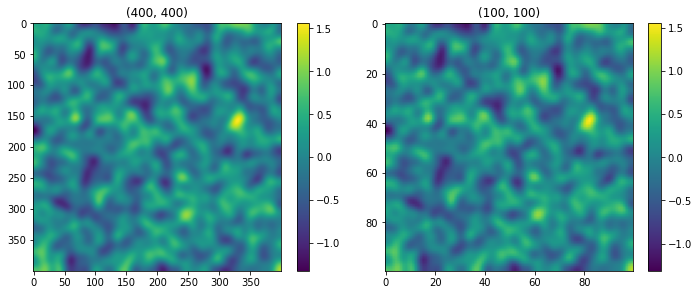

In [97]:
npix_hd = 400
image_hd = np.random.normal(size=(npix_hd, npix_hd))
image_hd = gaussian_filter(image_hd, 8) * 10

image_sd = zoom(image_hd, 0.25, order=3)
npix_sd = image_sd.shape[0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
img1 = ax1.imshow(image_hd)
ax1.set_title(image_hd.shape)
img2 = ax2.imshow(image_sd)
ax2.set_title(image_sd.shape)

for ax, img in zip((ax1, ax2), (img1, img2)):
    fig.colorbar(img, ax=ax)
fig.tight_layout()

### Interpolate

In [106]:
# Original grid
x_sd = np.linspace(-5, 5, npix_sd)
y_sd = np.linspace(-5, 5, npix_sd)

# Interpolation objects
scipy_interp = RectBivariateSpline(x_sd, y_sd, image_sd, kx=3, ky=3)  # order 3
jax_interp = BicubicInterpolator(x_sd, y_sd, image_sd)

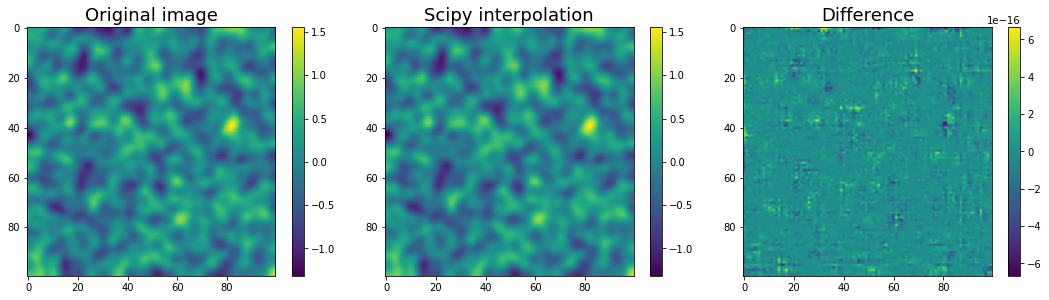

In [107]:
scipy_image = scipy_interp(x_sd, y_sd, dx=0, dy=0, grid=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1, ax2, ax3 = axes
img1 = ax1.imshow(image_sd)
img2 = ax2.imshow(scipy_image)
img3 = ax3.imshow(image_sd - scipy_image)
ax1.set_title("Original SD image", fontsize=FS)
ax2.set_title("Scipy interpolation", fontsize=FS)
ax3.set_title("Difference", fontsize=FS)
imgs = (img1, img2, img3)
for img, ax in zip(imgs, axes):
    fig.colorbar(img, ax=ax)
fig.tight_layout()

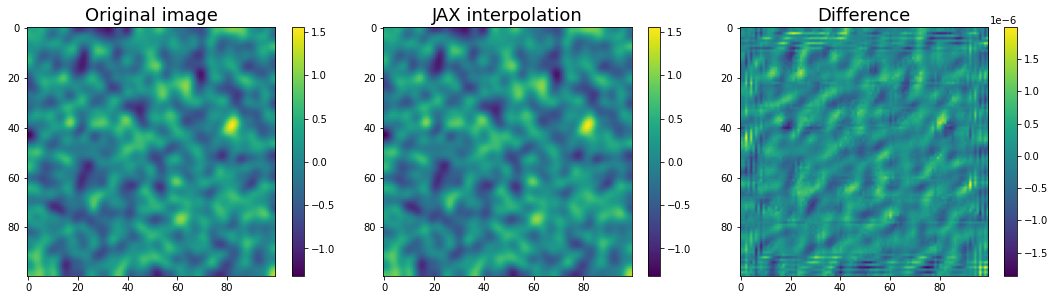

In [108]:
ygrid_sd, xgrid_sd = np.meshgrid(x_sd, y_sd)
jax_image = jax_interp(xgrid_sd, ygrid_sd, dx=0, dy=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1, ax2, ax3 = axes
img1 = ax1.imshow(image_sd)
img2 = ax2.imshow(jax_image)
img3 = ax3.imshow(image_sd - jax_image)
ax1.set_title("Original SD image", fontsize=FS)
ax2.set_title("JAX interpolation", fontsize=FS)
ax3.set_title("Difference", fontsize=FS)
imgs = (img1, img2, img3)
for img, ax in zip(imgs, axes):
    fig.colorbar(img, ax=ax)
fig.tight_layout()

### Test on upsampled grids

In [109]:
# Upsampled grid for testing
x_hd = np.linspace(-5, 5, npix_hd)
y_hd = np.linspace(-5, 5, npix_hd)
ygrid_hd, xgrid_hd = np.meshgrid(x_hd, y_hd)

### Original (4x) resolution

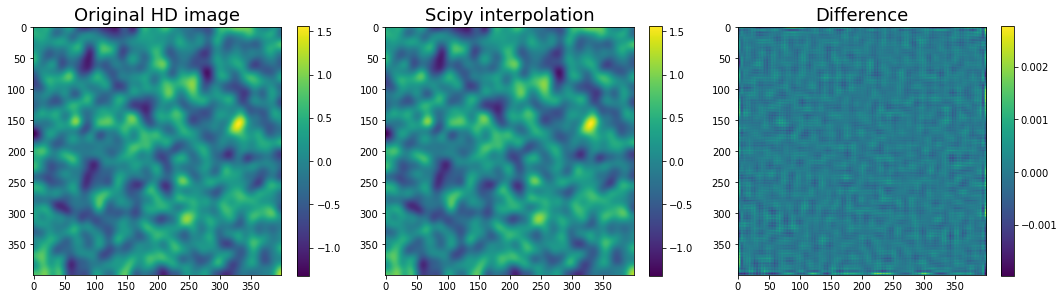

In [112]:
scipy_image = scipy_interp(x_hd, y_hd, dx=0, dy=0, grid=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1, ax2, ax3 = axes
img1 = ax1.imshow(image_hd)
img2 = ax2.imshow(scipy_image)
img3 = ax3.imshow(image_hd - scipy_image)
ax1.set_title("Original HD image", fontsize=FS)
ax2.set_title("Scipy interpolation", fontsize=FS)
ax3.set_title("Difference", fontsize=FS)
imgs = (img1, img2, img3)
for img, ax in zip(imgs, axes):
    fig.colorbar(img, ax=ax)
fig.tight_layout()

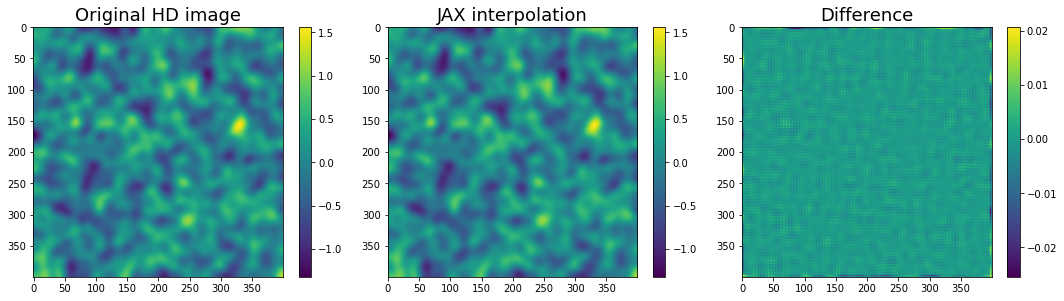

In [113]:
jax_image = jax_interp(xgrid_hd, ygrid_hd, dx=0, dy=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1, ax2, ax3 = axes
img1 = ax1.imshow(image_hd)
img2 = ax2.imshow(jax_image)
img3 = ax3.imshow(image_hd - jax_image)
ax1.set_title("Original HD image", fontsize=FS)
ax2.set_title("JAX interpolation", fontsize=FS)
ax3.set_title("Difference", fontsize=FS)
imgs = (img1, img2, img3)
for img, ax in zip(imgs, axes):
    fig.colorbar(img, ax=ax)
fig.tight_layout()

### Test derivatives

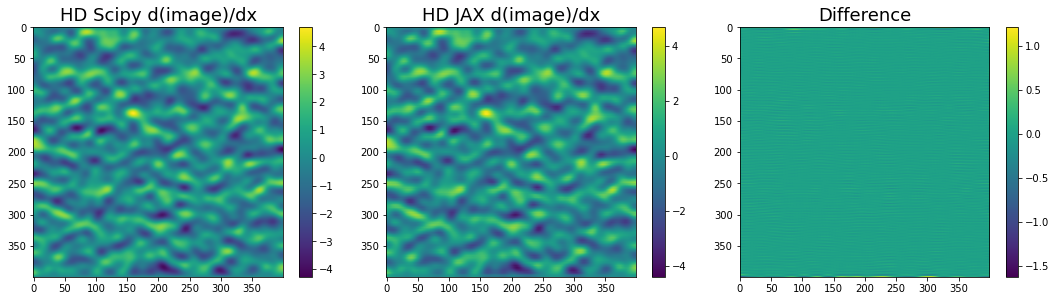

In [125]:
scipy_image = scipy_interp(x_hd, y_hd, dx=1, dy=0, grid=True)
jax_image = jax_interp(xgrid_hd, ygrid_hd, dx=1, dy=0)
# border cropping
b = 0

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1, ax2, ax3 = axes
img1 = ax1.imshow(scipy_image)
img2 = ax2.imshow(jax_image)
diff = scipy_image - jax_image
diff = diff[b:-b, b:-b] if b > 0 else diff
img3 = ax3.imshow(diff)
ax1.set_title("HD Scipy d(image)/dx", fontsize=FS)
ax2.set_title("HD JAX d(image)/dx", fontsize=FS)
ax3.set_title("Difference", fontsize=FS)
imgs = (img1, img2, img3)
for img, ax in zip(imgs, axes):
    fig.colorbar(img, ax=ax)
fig.tight_layout()

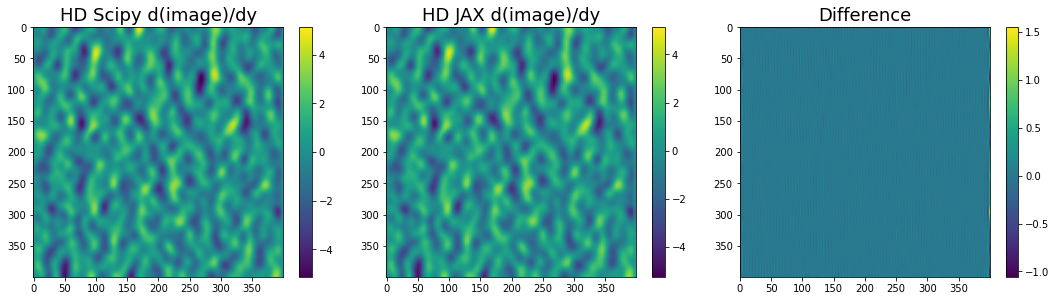

In [126]:
scipy_image = scipy_interp(x_hd, y_hd, dx=0, dy=1, grid=True)
jax_image = jax_interp(xgrid_hd, ygrid_hd, dx=0, dy=1)
# border cropping
b = 0

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
ax1, ax2, ax3 = axes
img1 = ax1.imshow(scipy_image)
img2 = ax2.imshow(jax_image)
diff = scipy_image - jax_image
diff = diff[b:-b, b:-b] if b > 0 else diff
img3 = ax3.imshow(diff)
ax1.set_title("HD Scipy d(image)/dy", fontsize=FS)
ax2.set_title("HD JAX d(image)/dy", fontsize=FS)
ax3.set_title("Difference", fontsize=FS)
imgs = (img1, img2, img3)
for img, ax in zip(imgs, axes):
    fig.colorbar(img, ax=ax)
fig.tight_layout()